# Time Series Analysis 📈

In [1]:
from IPython.display import Image
Image(url='https://blog.glugmvit.com/assets/images/time_series/cover.jpg', width=800)

# What is Time Series Data and its Types?

**Before jumping right into Time Series Ananlysis , lets first understand what is Time Series Data.**

* Time-series data is a collection of data points over a set period. Plot the points on a graph, and one of your axes would always be time.
* What sets time series data apart from other data is that the analysis can show how variables change over time. 
* The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
* In other words, time is a crucial variable because it shows how the data adjusts over the course of the data points as well as the final results. 
 It provides an additional source of information and a set order of dependencies between the data.

* The time series data may be of three types:-
1.  **Time series data** - The observations of the values of a variable recorded at different points in time is called time series data.
1.  **Cross sectional data** - It is the data of one or more variables recorded at the same point in time. Ex:-gross annual income for each of 1000 randomly chosen households in New York City for the year 2000.
1.  **Pooled data**- It is the combination of time series data and cross sectional data.

![Example](https://miro.medium.com/max/1286/1*16ZVajQnFAAs_wHM99jiaA.png)

# What is Time Series Analysis ? 

**Now that we have understood what Time Series data means .. lets understand what is Time Series analysis?**
* Time-series analysis is a method of analyzing data to extract useful statistical information and characteristics. 
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. 
* Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
* One of the study's main goals is to predict future value.

Examples of time series analysis:

    Electrical activity in the brain
    Rainfall measurements
    Stock prices
    Number of sunspots
    Annual retail sales
    Monthly subscribers
    Heartbeats per minute
    
# Why organizations use time series data analysis?

* Time series analysis helps organizations understand the underlying causes of trends or systemic patterns over time. 
* Using data visualizations, business users can see seasonal trends and dig deeper into why these trends occur.
* When organizations analyze data over consistent intervals, they can also use time series forecasting to predict the likelihood of future events.  

# Time Series Analysis Types

Some of the models of time series analysis include - 

**1 Classification**: It identifies and assigns categories to the data.

**2 Curve Fitting**: It plots data on a curve to investigate the relationships between variables in the data.

**3 Descriptive Analysis**: Patterns in time-series data, such as trends, cycles, and seasonal variation, are identified.

**4 Explanative analysis**: It attempts to comprehend the data and the relationships between it and cause and effect.

**5 Segmentation**: It splits the data into segments to reveal the source data's underlying properties. 


# Components of a Time-Series

1. **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
1. **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
1. **Noise** - Outliers or missing values
1. **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
1. **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
1. **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

![](https://editor.analyticsvidhya.com/uploads/89638Everything%20in%20a%20single%20picture_2.jpg)

**In this notebook we will work on Stock market prediction using S&P 500 historical data**

In [2]:
# The auto_arima module from pmdarima package is not directly available on Kaggle so we'll install it using pip.
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.8 MB/s eta 0:00:00


In [3]:
# importing libraries

import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM 
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

# Loading the dataset 

In [4]:
# Reading the dataset
df = pd.read_csv("../input/sp-500-historical-data/SPX.csv")
df.head(3)

# Here u can notice that our initial trading date is "1927-12-30" but with 0 stocks traded.

Date       Open       High        Low      Close  Adj Close  Volume
0  1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1  1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
2  1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0

Before getting started with the visualization part lets understand the meaning of these feature terms :-

* **Open** -> Open means the price at which a stock started trading when the opening bell rang.
* **Close** -> Close refers to the price of an individual stock when the stock exchange closed shop for the day. It represents the last buy-sell order executed between two traders
* **High** -> The high is the highest price at which a stock is traded during a period. 
* **Low** -> The low is the lowest price of the period.
* **Adj Close** -> Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance
* **Volume** -> Volume is the total number of shares traded in a security period. 

**Why is a Stock’s Closing Price Significant?**

* Stock’s closing price determines how a share performs during the day.
* **When researching historical stock price data**, financial institutions, regulators, and individual investors **use the closing price as the standard measure of the stock’s value as of a specific date**. For example, a stock’s close on December 31, 2019, was the closing price for that day and that week, month, quarter, and year.
* The difference between the stocks open and close divided by the open is the **stock’s return or performance in percentage terms**.

In [5]:
df.tail(5)
# Here u can notice that our final trading date is "2020-01-02" but with 3458250000 stocks traded.
# Here u can also notice that our time series data almost has daily interval.

Date         Open         High          Low        Close  \
23318  2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319  2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320  2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321  2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322  2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  
23318  3310.110107  4903070000  
23319  3269.959961  4840450000  
23320  3310.239990  4310590000  
23321  3369.159912  4220070000  
23322  3443.439941  4783040000

In [6]:
# Here u notice that our date is of Object datatype so well convert it to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df = df.set_index(df['Date']).sort_index() # setting date feature as our index
print(df.shape)
df.sample(5)

(23323, 7)


Date         Open         High          Low        Close  \
Date                                                                        
2005-08-22 2005-08-22  1219.709961  1228.959961  1216.469971  1221.729980   
1979-05-03 1979-05-03   101.720001   102.570000   101.250000   101.809998   
1986-05-21 1986-05-21   236.110001   236.830002   235.449997   235.449997   
1974-03-06 1974-03-06    97.320000    98.570000    96.540001    97.980003   
1944-08-07 1944-08-07    12.670000    12.670000    12.670000    12.670000   

              Adj Close      Volume  
Date                                 
2005-08-22  1221.729980  1621330000  
1979-05-03   101.809998    30870000  
1986-05-21   235.449997   117100000  
1974-03-06    97.980003    19140000  
1944-08-07    12.670000           0

In [8]:
# Checking the data types of  columns
# checking the count of null values -> 0 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23323 entries, 1927-12-30 to 2020-11-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23323 non-null  datetime64[ns]
 1   Open       23323 non-null  float64       
 2   High       23323 non-null  float64       
 3   Low        23323 non-null  float64       
 4   Close      23323 non-null  float64       
 5   Adj Close  23323 non-null  float64       
 6   Volume     23323 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.4 MB


<AxesSubplot:xlabel='Date'>

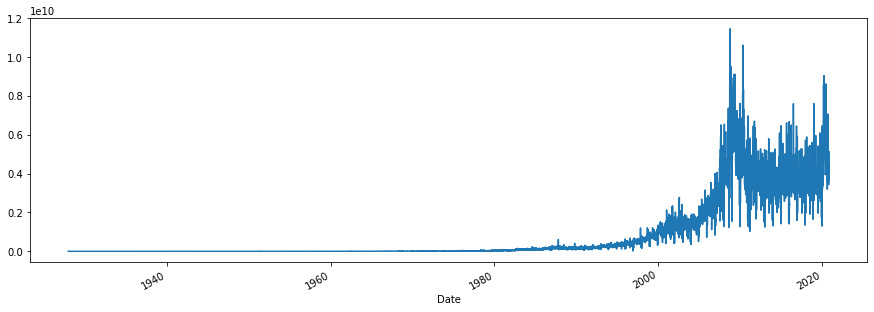

In [9]:
df['Volume'].plot(figsize=(15,5))
# Here u can notice that the major stock market trading started from around Year 2000

In [10]:
data = df[df['Volume']>0]
data.head(3)

# Here u can notice that the first stock market trading happened on "1950-01-03" with 1260000 Stocks being traded. 

Date   Open   High    Low  Close  Adj Close   Volume
Date                                                                 
1950-01-03 1950-01-03  16.66  16.66  16.66  16.66      16.66  1260000
1950-01-04 1950-01-04  16.85  16.85  16.85  16.85      16.85  1890000
1950-01-05 1950-01-05  16.93  16.93  16.93  16.93      16.93  2550000

In [11]:
# We'll consider the stock data from year 2000 onwards
data = data.loc['1987-10-28':]
data.shape

(8323, 7)

# Visualizing the Stock price Dataset 📈

<AxesSubplot:xlabel='Date'>

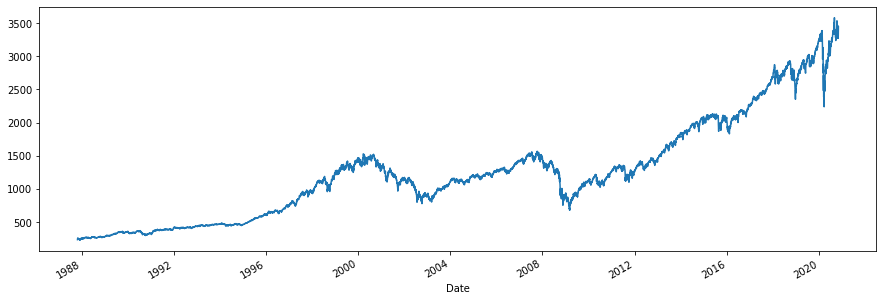

In [12]:
data['Close'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Close', ylabel='Density'>

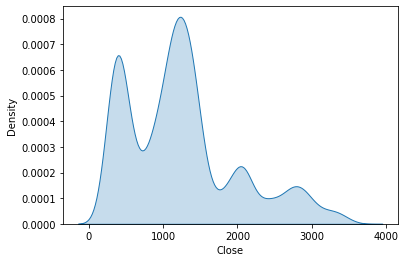

In [13]:
sns.kdeplot(data['Close'], shade=True)

In [14]:
# Adding Return Column

data['Return'] = (data['Adj Close']-data['Open'])/data['Open']

# making a copy for later use
stocks_data = data.copy()

data.sample(5)

Date         Open         High          Low        Close  \
Date                                                                        
1992-04-27 1992-04-27   409.029999   409.600006   407.640015   408.450012   
1998-10-21 1998-10-21  1063.930054  1073.609985  1058.079956  1069.920044   
1993-06-22 1993-06-22   446.250000   446.290009   444.940002   445.929993   
2019-03-13 2019-03-13  2799.780029  2821.239990  2799.780029  2810.919922   
2007-02-01 2007-02-01  1437.900024  1446.640015  1437.900024  1445.939941   

              Adj Close      Volume    Return  
Date                                           
1992-04-27   408.450012   172900000 -0.001418  
1998-10-21  1069.920044   745100000  0.005630  
1993-06-22   445.929993   259530000 -0.000717  
2019-03-13  2810.919922  3766150000  0.003979  
2007-02-01  1445.939941  2914890000  0.005591

In [15]:
# As mentioned earlier "When researching historical stock price data,use the closing price as the standard measure of the stock’s value"
# so let's try visualising the close price of the dataset using plotly

fig = px.line(data,x="Date",y="Close",title="Closing Price: Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

In [16]:
# Visualizing Returns

fig = px.line(data,x="Date",y="Return",title="Returns : Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

## Candlestick Plots

* Ask any person in the financial domain, the best way to represent a stock in terms of a plot would be a Candlestick plot. 
* These are essentially little boxplots that represent the Open, High, Close and Low of a stock on a given time frame. 
* A red candlestick is a bearish candle (Closing price < Opening price) and a green candle is a bullish candle (Closing price > Opening price)

![](https://images.contentstack.io/v3/assets/blt38dd155f8beb7337/blt7c01ee0ced45a82c/62284bd13b0a2616b0dfb389/Bearish_and_Bullish_Candlestick.jpg)

In [17]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                    open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show()

## OHLC Plots 📈📉

* Similar to a candle stick, you can also plot OHLC plots that essentially deliver the same purpose of ploting the Open, High, Low and CLose of a stock but just in the different aesthetic. 
* Also, like matplotlib even plotly has a make_subplots function that can be used to combine plots together, in our cases the OHLC plot with the Volume

![](https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg)

In [18]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

## Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

In [19]:
fig = go.Figure()
data['Close_M'] = data["Close"].asfreq('d')
data['Lag_Close_M'] = data['Close'].asfreq('d').shift(10)
fig.add_trace(go.Scatter(x=data.Date,y=data.Close_M,name='Close_M'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Lag_Close_M,name='Lag_Close_M'))
fig.show()

In [20]:
fig = go.Figure()
data['Volume_M'] = data["Volume"].asfreq('d')
data['Lag_Volume_M'] = data['Volume'].asfreq('d').shift(10)
fig.add_trace(go.Scatter(x=data.Date,y=data.Volume_M,name='Volume_M'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Lag_Volume_M,name='Lag_Volume_M'))
fig.show()

# Time Series Data Analysis - Resampling

* In time series, data consistency is of prime importance, resampling ensures that the data is distributed with a consistent frequency. 
* Resampling can also provide a different perception of looking at the data.
* In other words, it can add additional insights about the data based on the resampling frequency.

**Upsampling** - Time series is resampled from low frequency to high frequency (Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency (Weekly to monthly frequency). It involves aggregation of existing data.

Reference -> [How to use Resample in Pandas to enhance your time series data analysis](https://towardsdatascience.com/time-series-data-analysis-resample-1ff2224edec9)

In [21]:
# Here we'll be doing downsampling -> downsampling ex :- from months to years (decreasing data points)
# Where A represents "year end frequency" 
# max is the aggregator function

data.resample(rule='A').max().tail(5)

# Here we got the max feature values of each year for the last 5 years

Date         Open         High          Low        Close  \
Date                                                                        
2016-12-31 2016-12-30  2270.540039  2277.530029  2266.149902  2271.719971   
2017-12-31 2017-12-29  2692.709961  2694.969971  2685.919922  2690.159912   
2018-12-31 2018-12-31  2936.760010  2940.909912  2927.110107  2930.750000   
2019-12-31 2019-12-31  3247.229980  3247.929932  3234.370117  3240.020020   
2020-12-31 2020-11-04  3564.739990  3588.110107  3535.229980  3580.840088   

              Adj Close      Volume    Return      Close_M  Lag_Close_M  \
Date                                                                      
2016-12-31  2271.719971  7597450000  0.024414  2271.719971  2271.719971   
2017-12-31  2690.159912  5723920000  0.008097  2690.159912  2690.159912   
2018-12-31  2930.750000  7609010000  0.044255  2930.750000  2929.669922   
2019-12-31  3240.020020  6454270000  0.023283  3240.020020  3221.219971   
2020-12-31  3580.840088  9044690000  0.054876  3580.840088  3534.219971   

                Volume_M  Lag_Volume_M  
Date                                    
2016-12-31  7.597450e+09  6.503140e+09  
2017-12-31  5.723920e+09  5.284720e+09  
2018-12-31  7.609010e+09  7.609010e+09  
2019-12-31  6.454270e+09  6.454270e+09  
2020-12-31  9.044690e+09  9.044690e+09

<AxesSubplot:xlabel='Date'>

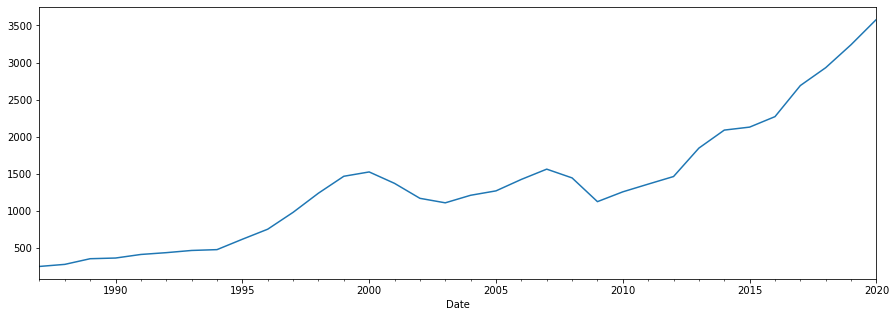

In [22]:
# Let's suppose if we want to visualize the max Close values of all years

data['Close'].resample(rule='A').max().plot(figsize=(15,5))

We can also explore other rules according to our necessities.from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Technical Indicators 🔼🔽 
#### Indicators are best way to visualize a stock pattern.

This article will focus on a list of technical indicators that are widely used by professionals and scholars, and those that I believe are most beneficial in automated trading. The list of indicators are:
1. Simple Moving Average (Fast and Slow)

2. Exponential Moving Average (Fast and Slow)

3. Relative Strength Index (RSI)

4. Moving Average Convergence Divergence (MACD)

## Simple Moving Average

* Simple Moving Average is one of the most common technical indicators. 
* SMA calculates the average of prices over a given interval of time and is used to determine the trend of the stock. 
* As defined above, I will create a slow SMA (SMA_15) and a fast SMA (SMA_5). 
* Here these numerical values represents the time interval like 15days.

In [23]:
#SMA
data['SMA_5'] = data['Close'].rolling(5).mean().shift()
data['SMA_15'] = data['Close'].rolling(15).mean().shift()


# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2019-06-04','2020-01-02'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.SMA_15,name='SMA_15'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close', opacity=0.3))
fig.show()

Although SMA is quite common, it contains a bias of giving equal weight to each value in the past.

## Exponential Moving Average (EMA)

* An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.
* Basically what it means is that the newer stock price data has a higher weightage/significance on the price than older days.

In [24]:
#EMA

data['EMA_5'] = data['Close'].ewm(5).mean().shift()
data['EMA_15'] = data['Close'].ewm(15).mean().shift()

# If u want to visualize between a range of specific dates u can do it like -> fig = go.Figure(layout_xaxis_range=['2019-06-04','2020-01-02'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.EMA_15,name='EMA_15'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close', opacity=0.3))
fig.show()

In [25]:
# Now lets compare SMA's and EMA's

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.SMA_5,name='SMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.EMA_5,name='EMA_5'))
fig.add_trace(go.Scatter(x=data.Date,y=data.Close,name='Close', opacity=0.3))
fig.show()
# EMA_5 is performing better than SMA_5 as it is closer to CLosing price of Stock.

## Relative Strength Index (RSI)

* A momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock. 
* If the RSI value is >70 then the stock is overbought and if <30 then its oversold.
* The basic formula is:

**RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]**

Reference -> [Relative Strength Index (RSI)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI)

![](https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/RSI1_602x345.png)           ![](https://www.fidelity.com/bin-public/060_www_fidelity_com/images/LC/RSI2_Diverg602x345.png)

In [26]:
def RSI(df,n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp<0]=0
    pricesDown[pricesDown>0]=0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

data['RSI'] = RSI(df).fillna(0)

fig = go.Figure(go.Scatter(x=data.Date,y=data.RSI,name='RSI'))
fig.show()

## Moving Average Convergence Divergence (MACD)

* MACD uses two exponentially moving averages and creates a trend analysis based on their convergence or divergence.
* The most commonly used MACD slow and fast signals are based on 26 days and 12 days respectively.
* The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
* Similar to RSI, MACD triggers technical signals **when it crosses above (to buy) or below (to sell) its signal line**.

In [27]:
data['EMA_12'] = pd.Series(data['Close'].ewm(span=12).mean())
data['EMA_26'] = pd.Series(data['Close'].ewm(span=26).mean())
data['MACD'] = pd.Series(data['EMA_12'] - data['EMA_26'])
data['MACD_signal'] = pd.Series(data.MACD.ewm(span=9,min_periods=9).mean())

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD,name='MACD'))
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD_signal,name='MACD_signal'))
fig.show()

**There are many other kind of Technical Indicators which we use to understand market Trend.**

1. [10 trading indicators every trader should know](https://www.ig.com/en/trading-strategies/10-trading-indicators-every-trader-should-know-190604)
2. [Best 25 Technical Indicators that Every Trader Should Know](https://www.elearnmarkets.com/blog/best-25-technical-indicators/)

# Time Series Decomposition

* We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. 
* The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual. 
* The seasonal_decompose in statsmodels is used to implements the decomposition.

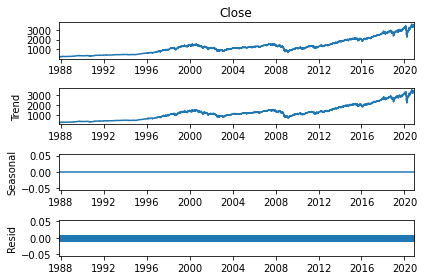

In [28]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()

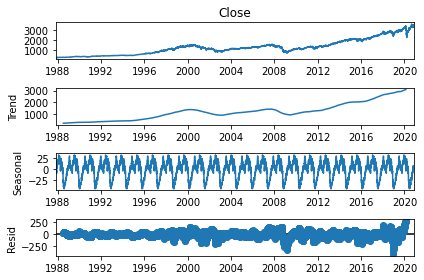

In [29]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=365) # The frequncy is yearly
figure = result.plot()

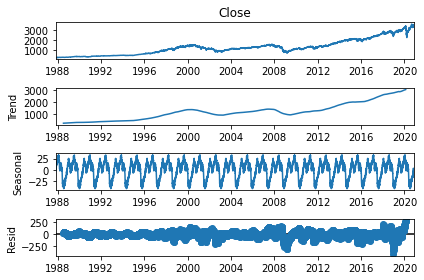

In [30]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=366) # The frequncy is yearly
figure = result.plot()



*     There is clearly an upward trend in the above plot.
*     You can also see the uniform seasonal change.
*     Non-uniform noise that represent outliers and missing values


# Stationary Test / ADF (Augmented Dickey-Fuller) Test

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

*     Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
*     Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

* First, we need to check if a series is stationary or not because time series analysis only works with stationary data.
* The Dickey-Fuller test is one of the most popular statistical tests. 
* It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

**Null Hypothesis**: The series has a unit root (value of a =1)

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

**If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.**

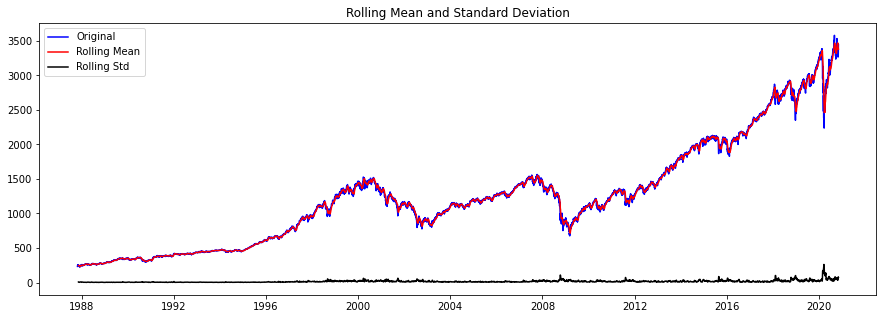

Results of dickey fuller test
Test Statistics                   1.211297
p-value                           0.996063
No. of lags used                 36.000000
Number of observations used    8286.000000
dtype: float64


In [31]:
#Test for staionarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(data['Close'])    



Through the above graph, we can see the increasing mean and standard deviation and hence **our series is not stationary.**

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

### DIFFERENCING:

    Differencing is a popular and widely used data transform for making time series data stationary.

    Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

    Differencing shifts ONE/MORE row towards downwards.

[Source Video](https://www.youtube.com/watch?v=nPYPyh20gGo)

In [32]:
data['Stocks First Difference']=data['Close']-data['Close'].shift(1)
data['Stocks Seasonal Difference']=data['Close']-data['Close'].shift(12)
data['Stocks Seasonal+Daily Difference']=data['Stocks Seasonal Difference']-data['Stocks Seasonal Difference'].shift(1)

In [33]:
adft = adfuller(data['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -1.626527e+01
p-value                        3.532446e-29
No. of lags used               3.500000e+01
Number of observations used    8.286000e+03
dtype: float64


In [34]:
adft = adfuller(data['Stocks Seasonal Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -1.276394e+01
p-value                        8.032575e-24
No. of lags used               3.700000e+01
Number of observations used    8.273000e+03
dtype: float64


In [35]:
adft = adfuller(data['Stocks Seasonal+Daily Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics                 -24.1143
p-value                           0.0000
No. of lags used                 37.0000
Number of observations used    8272.0000
dtype: float64


<AxesSubplot:xlabel='Date'>

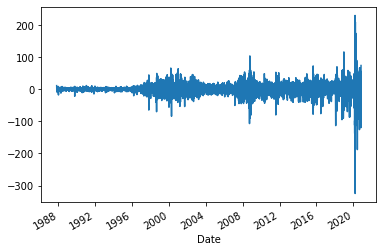

In [36]:
data['Stocks First Difference'].plot()


NOW OUR DATA IS STATIONARY.

# ARIMA Model

* Autoregressive integrated moving average (ARIMA) models predict future values based on past values.
* ARIMA makes use of lagged moving averages to smooth time series data.
* They are widely used in technical analysis to forecast future security prices.

 According to the name, we can split the model into smaller components as follow:
1. **AR**: an AutoregRegressive model which represents a type of random process. The output of the model is linearly dependent on its own previous value i.e. some number of lagged data points or the number of past observations.
1. **I**: integrated here means the differencing step to generate stationary time series data, i.e. removing the seasonal and trend components.
1. **MA**: a Moving Average model which output is dependent linearly on the current and various past observations of a stochastic term.

ARIMA model is generally denoted as **ARIMA(p, d, q)** and parameter p, d, q are defined as follow:

1. **p**: the lag order or the number of time lag of autoregressive model AR(p)
1. **d**: degree of differencing or the number of times the data have had subtracted with past value
1. **q**: the order of moving average model MA(q)

Its time to choose parameters p,q,d for ARIMA model. The value of p,d, and q are choosen by observing the plots of ACF and PACF but right now we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

[Source video](https://www.youtube.com/watch?v=4Fiz3dQM_i8)


**Auto ARIMA**: Automatically discover the optimal order for an ARIMA model.

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.


# Autocorrelation and Partial Autocorrelation

* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

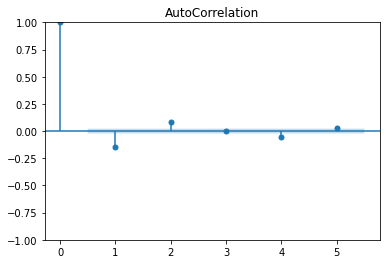

In [37]:
plot_acf(data["Stocks First Difference"].dropna(),lags=5,title="AutoCorrelation")
plt.show()

# As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.
# A u can see ... the diverging blue region is confidence interval

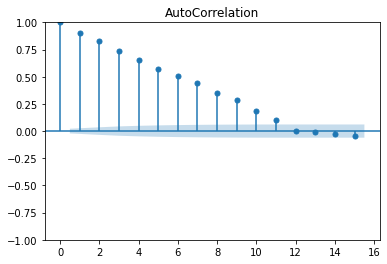

In [38]:
plot_acf(data["Stocks Seasonal Difference"].dropna(),lags=15,title="AutoCorrelation")
plt.show()

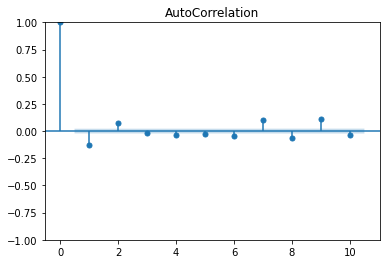

In [39]:
plot_acf(data["Stocks Seasonal+Daily Difference"].dropna(),lags=10,title="AutoCorrelation")
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



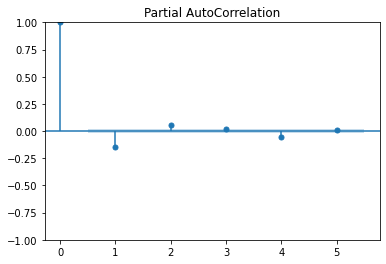

In [40]:
plot_pacf(data["Stocks First Difference"].dropna(),lags=5,title="Partial AutoCorrelation")
plt.show()

# Here, only 0th and 1st are statistically significant.

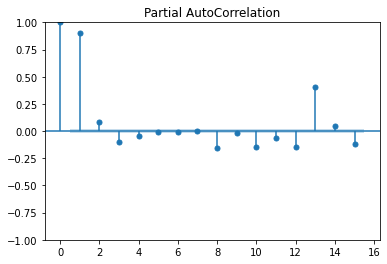

In [41]:
plot_pacf(data["Stocks Seasonal Difference"].dropna(),lags=15,title="Partial AutoCorrelation")
plt.show()

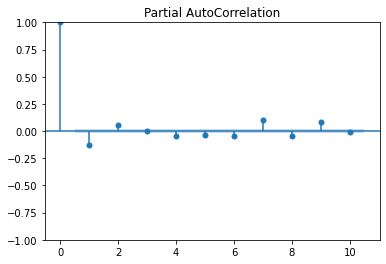

In [42]:
plot_pacf(data["Stocks Seasonal+Daily Difference"].dropna(),lags=10,title="Partial AutoCorrelation")
plt.show()


Here these two graphs will help you to find the p and q values.

    Partial AutoCorrelation Graph is for the p-value.
    AutoCorrelation Graph for the q-value.


# Forecasting

### Split the data


Important Note on Cross Validation

To measure the performance of our forecasting model, We typically want to split the time series into a training period and a validation period. This is called fixed partitioning.

    We'll train our model on the training period, we'll evaluate it on the validation period. Here's where you can experiment to find the right architecture for training. And work on it and your hyper parameters, until you get the desired performance, measured using the validation set. Often, once you've done that, you can retrain using both the training and validation data.And then test on the test(or forecast) period to see if your model will perform just as well.

    And if it does, then you could take the unusual step of retraining again, using also the test data. But why would you do that? Well, it's because the test data is the closest data you have to the current point in time. And as such it's often the strongest signal in determining future values. If your model is not trained using that data, too, then it may not be optimal.

Here, we we will opt for a hold-out based validation.

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us **split the data into train and test set** and visualize it.


*     **train**: Data from 1987 to 31st December, 2018.
*     **valid**: Data from 1st January, 2019 to 2020.


In [43]:
stocks_data=stocks_data[stocks_data.Date > "2015"]
df_train = stocks_data[stocks_data.Date < "2019"]
df_valid = stocks_data[stocks_data.Date >= "2019"]

## Rolling ARIMA

In [44]:
train = df_train['Close'].values
test = df_valid['Close'].values

In [45]:
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(df_valid)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.7/sit

**Mean square error**

Mean square error or mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

[Source Video](https://www.youtube.com/watch?time_continue=1&v=Mhw_-xHVmaE&feature=emb_logo)

In [46]:
# evaluate forecasts
rolling_mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % rolling_mse)

Test MSE: 2195.344


In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_Rolling_ARIMA'))
fig.show()

## ARIMA

**Functions to remove Trend and Seasonality**

In [48]:
# method to be used later
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

### Trend Differencing by using Daily Lag 

In [49]:
differenced = difference(train)
model=ARIMA(differenced,order=(2,1,2))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

In [50]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    history.append(inverted)
    predicted_results.append(inverted)

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [52]:
mse_daily = mean_squared_error(df_valid['Close'],predicted_results)
print('Test MSE: %.3f' %mse_daily)

Test MSE: 210237.399


### Seasonal differencing using Seasonal lag 

In [53]:
days_in_year=365
differenced = difference(train,days_in_year)
model=ARIMA(differenced,order=(10,1,4))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [54]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    predicted_results.append(inverted)

In [55]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [56]:
# evaluate forecasts
mse_seasonal = mean_squared_error(test, predicted_results)
print('Test MSE: %.3f' % mse_seasonal)

Test MSE: 142606.217


### Seasonal+Daily Differencing

In [57]:
days_in_year=365
differenced_S = difference(train,days_in_year)
differenced = difference(differenced_S)
model=ARIMA(differenced,order=(5,2,5))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
interval=366
for yhat in forecast:
    inverted = inverse_difference(history, yhat, interval)
    history.append(inverted)
    predicted_results.append(inverted)

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [60]:
# evaluate forecasts
mse_sd = mean_squared_error(test, predicted_results)
print('Test MSE: %.3f' % mse_sd)

Test MSE: 250851.871


In [61]:
# Therefore from above we can Conclude that lowest mse score was achieved by Seasonal differencing.
best_arima_mse = mse_seasonal

# LSTM

Long Short-Term Memory (LSTM) models are a type of recurrent neural network capable of learning sequences of observations. This makes them a deep learning network well suited for time series forecasting. 

[Source_video](https://www.youtube.com/watch?v=QciIcRxJvsM)<br>
[Blog](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

In [62]:
training_values = np.reshape(train,(len(train),1))
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
# assign training values
x_train = training_values[0:len(training_values)-1]
y_train = training_values[1:len(training_values)]
x_train = np.reshape(x_train,(len(x_train),1,1))

In [63]:
# creates model
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model
model.fit(x_train,y_train,epochs=25,batch_size=8)

2022-10-12 17:37:28.143756: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-12 17:37:28.838837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
126/126 [==============================] - 5s 5ms/step - loss: 0.0346
Epoch 2/25
126/126 [==============================] - 1s 5ms/step - loss: 4.5995e-04
Epoch 3/25
126/126 [==============================] - 1s 5ms/step - loss: 4.6736e-04
Epoch 4/25
126/126 [==============================] - 1s 5ms/step - loss: 4.3220e-04
Epoch 5/25
126/126 [==============================] - 1s 5ms/step - loss: 3.9584e-04
Epoch 6/25
126/126 [==============================] - 1s 5ms/step - loss: 3.6426e-04
Epoch 7/25
126/126 [==============================] - 1s 5ms/step - loss: 4.3061e-04
Epoch 8/25
126/126 [==============================] - 1s 5ms/step - loss: 3.7415e-04
Epoch 9/25
126/126 [==============================] - 1s 5ms/step - loss: 3.8449e-04
Epoch 10/25
126/126 [==============================] - 1s 5ms/step - loss: 3.8043e-04
Epoch 11/25
126/126 [==============================] - 1s 5ms/step - loss: 3.7677e-04
Epoch 12/25
126/126 [==============================] - 1s 5ms/step 

In [64]:
# assign test and predicted values + reshaping + converting back from scaler
test_values = np.reshape(test, (len(test), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price=np.squeeze(predicted_price)

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_price,name='Forecast_LSTM'))
fig.show()

In [66]:
# evaluate forecasts
mse_lstm = mean_squared_error(test, predicted_price)
print('Test MSE: %.3f' % mse_lstm)

Test MSE: 295.546


# Comparing model scores

In [67]:
models = ['Rolling ARIMA','ARIMA','LSTM']
lst_acc = [rolling_mse,best_arima_mse,mse_lstm]
MSE = pd.DataFrame({'Model': models, 'Mean Squared Error': lst_acc})
MSE.sort_values(by="Mean Squared Error")

Model  Mean Squared Error
2           LSTM          295.546123
0  Rolling ARIMA         2195.343708
1          ARIMA       142606.216933

# THANK YOU for Reading!!!